# Mini Project - Bank Customer Churn Dataset

### SIT - 18070122004 - Aditya Banerjee - Final Year CS
_______________________________________________________________________________________________________________________________

## Problem Statement
The problem statement here is to predict churn from the bank customer dataset. Apply a
suitable machine learning algorithm and predict which customers are most likely to
leave the bank.

## Data Preparation & Pre-processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv('Bank_Customer_Churn_dataset.csv')
dataset.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [2]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
dataset = dataset.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [6]:
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA and Feature Selection

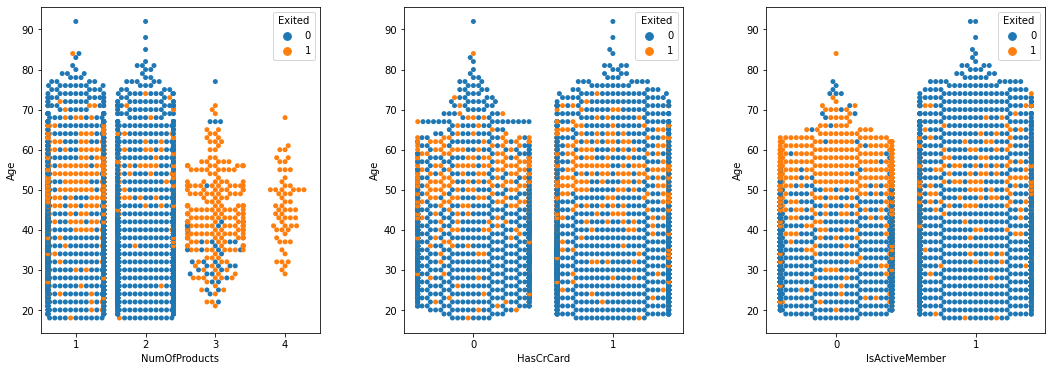

In [17]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = dataset, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", hue="Exited", data = dataset, ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = dataset, ax = ax[2])

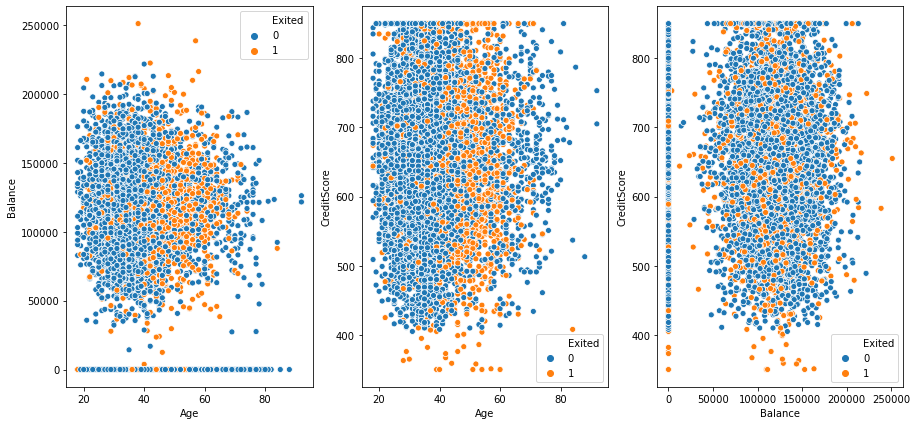

In [18]:
_, ax =  plt.subplots(1, 3, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[1])
sns.scatterplot(x = "Balance", y = "CreditScore", hue="Exited", data = dataset, ax = ax[2])

In [19]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


After EDA, we can see that although features such as "CreditScore", "NumOfProducts", "HasCrCard", and "EstimatedSalary" show a low correlation score with respect to our target variable "Exited", there is a clear inter-relation between the features that make each of them a contributing factor towards the final outcome.
For instance, "CrediScore" has a low correlation score of -0.027. However, we can identify clear regions in the graph of "CreditScore" with respect to "Age", and how a specific range of age combined with their credit scores can lead to a better understanding of the scores at which the customers consider churning and at what age is that score relevant.
Hence, for our model, due to a high inter-relatability of the features, we will take all the features into account.

## Training and Testing Sets

In [20]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [22]:
encoder = LabelEncoder()
dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [24]:
x = dataset.drop("Exited", axis=1)
y = dataset["Exited"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## Training and Prediction for both models

### Decision Tree Classifier

In [26]:
classifier = DecisionTreeClassifier(criterion = "entropy",random_state=2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[1402  215]
 [ 194  189]]


### Random Forest Classifier

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_2 = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred_2)
print(cm)

[[1561   56]
 [ 229  154]]


## Model Accuracy Results

In [28]:
score_decisiontree = metrics.accuracy_score(y_test,y_pred)
print('The accuracy of the Decision Tree Model is', score_decisiontree)

The accuracy of the Decision Tree Model is 0.7955


In [29]:
score_randomforest = rf.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8575


## Conclusion

For this mini project, our two chosen models were the Decision Tree Classifier and the Random Forest Classifier since the problem was a classification problem. Naturally, we have a lot more classification models that could have been implemented. However, we decided to stick with the models that were taught during our sessions and, of course, keeping in mind the relevance to the problem statement itself. We effectively and efficiently prepared and explored the dataset before feeding the data into the classification models post the selection and adjustments of the features.


After successfully implementing the models, we have seen that the Random Forest Classifier yields more accurate prediction results as compared to the Decision Tree Classifier, as it is to be expected in any generic case. With the accuracy of 85.75% coming from the Random Forest Classifier, we can conclude this assignment.